In [1]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import ReceptiveField
import pickle
import numpy as np
import  modin.pandas as pd
import os
from tqdm import tqdm
from NRC import NRC,recordModule
from matplotlib.pyplot import MultipleLocator
from matplotlib.gridspec import GridSpec
from utils import returnSpec
from distributed import Client
client = Client()

/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/numba/core/types/__init__.py:108: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  long_ = _make_signed(np.long)


ImportError: cannot import name 'DataError' from 'pandas.core.base' (/Users/shinanlin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/base.py)

# Sweep

## 40-target classification

In [2]:
scores = []
add = '../results/compare'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:

    subFolder = add+os.sep+sub+os.sep+'classification.csv'
    if os.path.exists(subFolder):
        f = pd.read_csv(subFolder)
        scores.append(f)

scores = pd.concat(scores,ignore_index=True).drop_duplicates()
scores.head()

NameError: name 'os' is not defined

<AxesSubplot: xlabel='accuracy', ylabel='Density'>

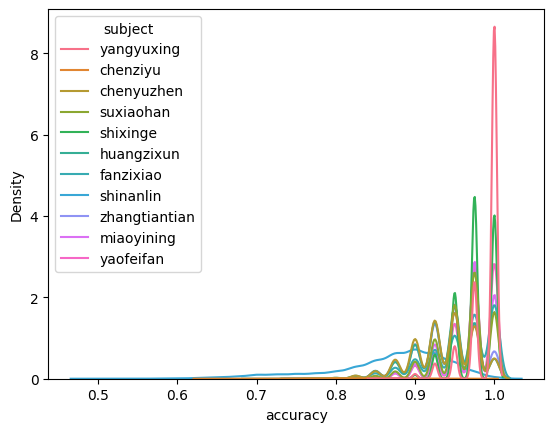

In [10]:
sns.kdeplot(scores[scores.winLEN == 0.3], x='accuracy',
            hue='subject', common_norm=True)

<AxesSubplot: xlabel='winLEN', ylabel='accuracy'>

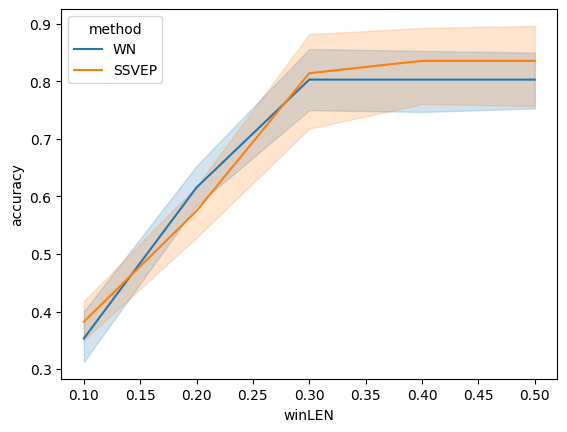

In [12]:
sns.lineplot(scores,x='winLEN',y='accuracy',hue='method')

In [4]:
aveScore = scores.groupby(['seed','subject','winLEN'],as_index=False).mean()
aveScore = aveScore.sort_values(by='score',ascending=False)
aveScore.head()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


,seed,subject,winLEN,Unnamed: 0,accuracy,ITR,cv
0,0,shinanlin,0.1,22.5,0.289062,72.128245,3.5
1,0,shinanlin,0.2,23.5,0.515625,152.877138,3.5
2,0,shinanlin,0.3,24.5,0.607812,173.042310,3.5


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

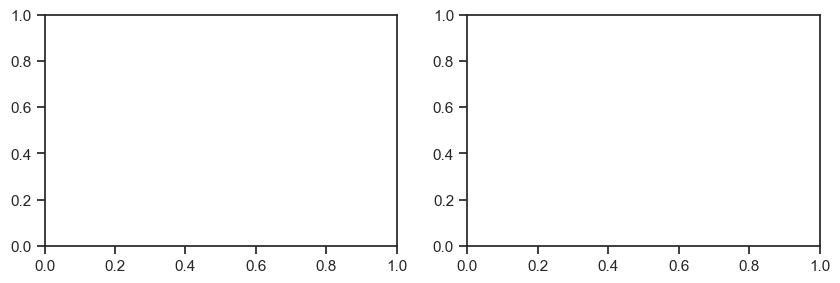

In [6]:
sns.set_theme(style='ticks')
f,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
sns.violinplot(data=aveScore, x='winLEN', y='accuracy', ax=ax1, legend=False)
sns.violinplot(data=aveScore,x='winLEN',y='ITR',hue='subject',ax=ax2,legend=True)

<AxesSubplot:xlabel='ITR', ylabel='Density'>

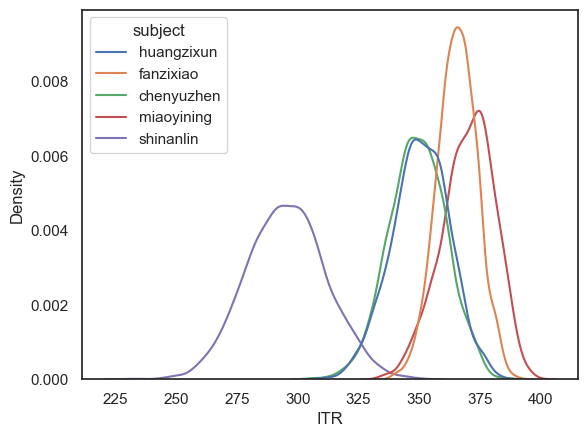

In [40]:
sns.set_theme(style='white')
sns.kdeplot(data=aveScore[aveScore.winLEN==0.3],x='ITR',hue='subject',common_norm=True,fill=False)

## 160 classification

In [8]:
allClass = []
add = '../results/sweep'
subs = os.listdir(add)
subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-160.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-160.csv')
        allClass.append(f)

allClass = pd.concat(allClass,ignore_index=True).drop_duplicates()
allClass.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.56250,0.2,wn,0,0,chenyuzhen
1,1,0.83125,0.3,wn,0,0,chenyuzhen
2,2,0.94375,0.4,wn,0,0,chenyuzhen
3,3,0.99375,0.5,wn,0,0,chenyuzhen
4,4,0.98750,0.6,wn,0,0,chenyuzhen


In [9]:
allClass[allClass.subject=='miaoyining'].head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
96,48,0.71875,0.2,wn,0,0,miaoyining
97,49,0.95625,0.3,wn,0,0,miaoyining
98,50,1.00000,0.4,wn,0,0,miaoyining
99,51,1.00000,0.5,wn,0,0,miaoyining
100,52,1.00000,0.6,wn,0,0,miaoyining


<AxesSubplot:xlabel='winLEN', ylabel='score'>

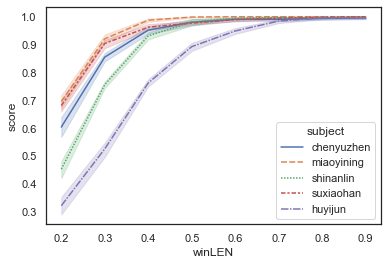

In [10]:
sns.set_theme(style='white')
f,ax = plt.subplots()
sns.lineplot(data=allClass,x='winLEN',y='score',hue='subject',style='subject')

# Speller

In [11]:
compare = []
add = '../results/compare'
subs = os.listdir(add)
for sub in subs:

    subFolder = add+os.sep+sub+os.sep+'classification.csv'
    if os.path.exists(subFolder):
        f = pd.read_csv(subFolder)
        compare.append(f)

compare = pd.concat(compare,ignore_index=True).drop_duplicates()
compare.head()

,Unnamed: 0,accuracy,winLEN,ITR,method,cv,seed,subject
0,0,0.425,0.1,129.911356,WN,0,0,ehab
1,1,0.675,0.2,230.951679,WN,0,0,ehab
2,2,0.750,0.3,239.197456,WN,0,0,ehab
3,3,0.700,0.4,190.334435,WN,0,0,ehab
4,4,0.700,0.5,171.300992,WN,0,0,ehab


<AxesSubplot: xlabel='winLEN', ylabel='accuracy'>

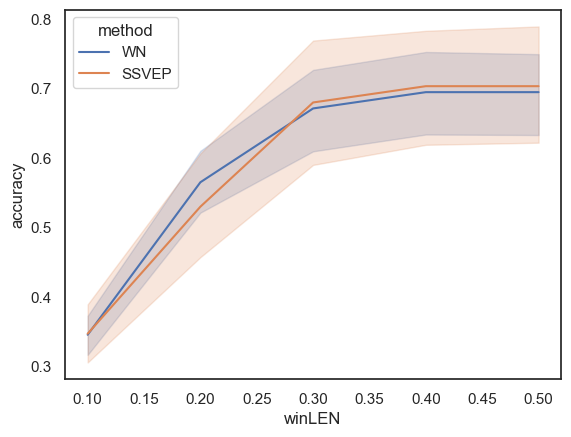

In [12]:
sns.lineplot(data=compare,x='winLEN',y='accuracy',hue='method')

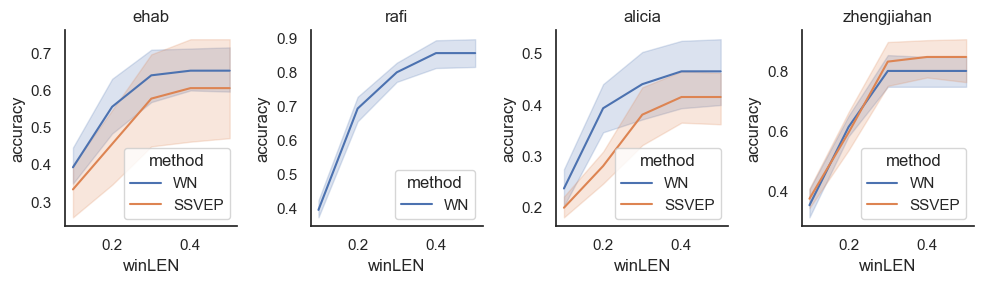

In [10]:
f,axs = plt.subplots(1,4,figsize=(10,3))
sns.set_theme(style='white')
for ax,sub in zip(axs,compare.subject.unique()):
    sns.lineplot(data=compare[compare.subject==sub],x='winLEN',y='accuracy',hue='method',ax=ax)
    ax.set_title('%s'%sub)
    sns.despine()
plt.tight_layout()
# plt.savefig('./images/wn.png',format='png',dpi=300)

In [4]:
scores = []
add = '../results/confirm'
subs = os.listdir(add)
for sub in subs:
    subFolder = add+os.sep+sub
    f = pd.read_csv(subFolder+os.sep+'classification.csv')
    scores.append(f)

scores = pd.concat(scores, ignore_index=True).drop_duplicates()
scores.head()


,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.375,0.2,wn,0,0,huangchangxing
1,1,0.575,0.3,wn,0,0,huangchangxing
2,2,0.750,0.4,wn,0,0,huangchangxing
3,3,0.775,0.5,wn,0,0,huangchangxing
4,4,0.875,0.6,wn,0,0,huangchangxing


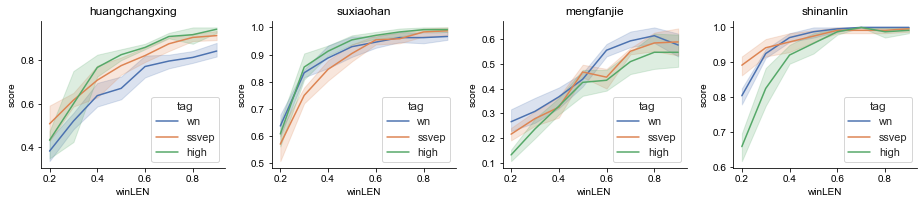

In [4]:
f,axs = plt.subplots(1,4,figsize=(13,3))
sns.set_theme(style='white')
for ax,sub in zip(axs,scores.subject.unique()):
    sns.lineplot(data=scores[scores.subject==sub],x='winLEN',y='score',hue='tag',ax=ax)
    ax.set_title('%s'%sub)
    sns.despine()
plt.tight_layout()
# plt.savefig('./images/wn.png',format='png',dpi=300)

<AxesSubplot:xlabel='winLEN', ylabel='score'>

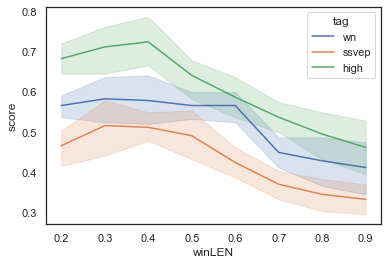

In [5]:
f,ax = plt.subplots()
sns.lineplot(data=scores[scores.subject=='zhaoxiaobai'],x='winLEN',y='score',hue='tag')
# ax.set_xlim([0.2,0.6])
# ax.set_ylim([0.9,1])

# Dense

In [10]:
dense = []
add = '../results/dense'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-dense.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-dense.csv')
        dense.append(f)

dense = pd.concat(dense,ignore_index=True).drop_duplicates()
dense.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.17500,0.2,ssvep,0,0,huangchangxing
1,1,0.30625,0.3,ssvep,0,0,huangchangxing
2,2,0.51250,0.4,ssvep,0,0,huangchangxing
3,3,0.59375,0.5,ssvep,0,0,huangchangxing
4,4,0.59375,0.6,ssvep,0,0,huangchangxing


Text(0.5, 0.98, '160 classification:single target paradigm')

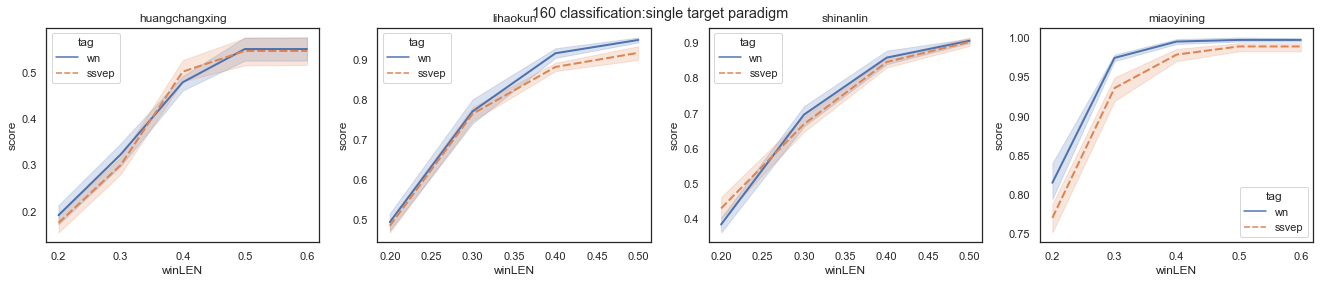

In [11]:
nSub = len(dense.subject.unique())
sns.set_theme(style='white')
f,axes = plt.subplots(ncols=nSub,nrows=1,figsize=(18.5,4))
for (sub,ax) in zip(dense.subject.unique(),axes.flatten()):

    sns.lineplot(data=dense[dense.subject==sub],x='winLEN',y='score',hue='tag',style='tag',ax=ax,hue_order=['wn','ssvep'],style_order=['wn','ssvep'],linewidth=2)
    ax.set_title('%s'%sub)

plt.tight_layout()
plt.suptitle('160 classification:single target paradigm')
# plt.savefig('../images/160single.png',dpi=300)

## distribution

In [5]:
dense = []
add = '../results/dense'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-dense-random.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-dense-random.csv')
        dense.append(f)

dense = pd.concat(dense,ignore_index=True).drop_duplicates()
dense.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.550,0.3,wn,0,0,huangchangxing
1,1,0.525,0.3,wn,1,0,huangchangxing
2,2,0.500,0.3,wn,2,0,huangchangxing
3,3,0.575,0.3,wn,3,0,huangchangxing
4,4,0.475,0.3,wn,4,0,huangchangxing


In [6]:
denseAve = dense.groupby(['seed','subject','tag'],as_index=False).mean()
denseAve = denseAve.sort_values(by='score',ascending=False)
denseAve.head()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


,seed,subject,tag,Unnamed: 0,score,winLEN,cv
1125,140,miaoyining,wn,5642.5,1.0,0.3,2.5
1485,185,miaoyining,wn,5912.5,1.0,0.3,2.5
1477,184,miaoyining,wn,5906.5,1.0,0.3,2.5
309,38,miaoyining,wn,5030.5,1.0,0.3,2.5
1565,195,miaoyining,wn,5972.5,1.0,0.3,2.5


Text(0.5, 1.0, '40 target classification results(T=0.3s)')

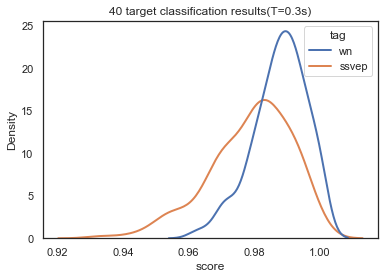

In [7]:
f,ax = plt.subplots()
sns.set_theme(style='white')
sns.kdeplot(data=denseAve[denseAve.subject=='miaoyining'], x='score', hue='tag',linewidth=2)
ax.set_title('40 target classification results(T=0.3s)')
# plt.savefig('../images/160random40.png',dpi=400)

Text(0.5, 0.98, '160 classification:single target paradigm')

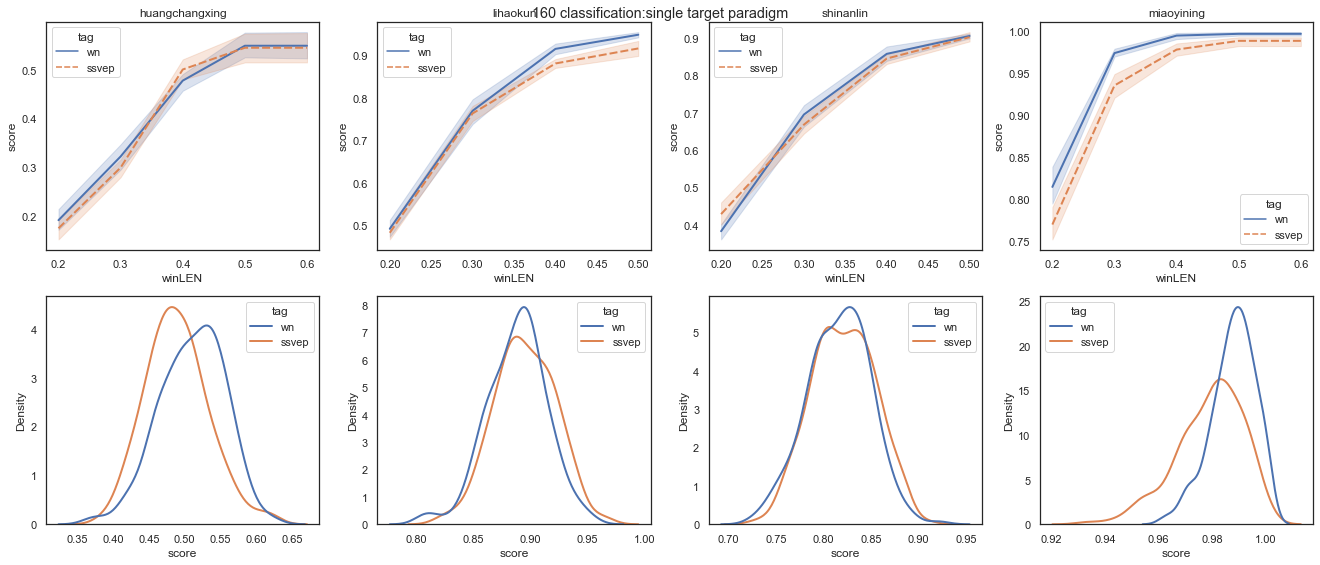

In [23]:
nSub = len(dense.subject.unique())
sns.set_theme(style='white')
f, axes = plt.subplots(ncols=nSub, nrows=2, figsize=(18.5, 8))
for (sub, ax) in zip(dense.subject.unique(), axes.T):

    sns.lineplot(data=dense[dense.subject == sub], x='winLEN', y='score', hue='tag',
                 style='tag', ax=ax[0], hue_order=['wn', 'ssvep'], style_order=['wn', 'ssvep'], linewidth=2)
    ax[0].set_title('%s' % sub)

    sns.kdeplot(data=denseAve[denseAve.subject==sub], x='score', hue='tag',linewidth=2,ax=ax[1],hue_order=['wn','ssvep'])

    # ax[0].set_title('%s' % sub)
    
plt.tight_layout()
# plt.suptitle('160 classification:single target paradigm')
plt.savefig('../images/160single.png',dpi=300)

# Unsupervised

In [3]:
un = []
add = '../results/sweep'
subs = os.listdir(add)
subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'unsupervised.csv'):
        f = pd.read_csv(subFolder+os.sep+'unsupervised.csv')
        un.append(f)

un = pd.concat(un,ignore_index=True).drop_duplicates()
un = un.rename(columns={'targetN': 'N'})
un['ITR'] = un[['accuracy', 'winLEN','N']].apply(lambda row: acutualITR(row), axis=1)
un.tail()

,Unnamed: 0,subject,accuracy,winLEN,train,N,ITR
195,35,miaoyining,0.825000,0.5,90,40,447.356025
196,36,miaoyining,0.916667,0.6,90,40,446.766106
197,37,miaoyining,0.958333,0.7,90,40,415.870347
198,38,miaoyining,0.987500,0.8,90,40,386.918697
199,39,miaoyining,0.987500,0.9,90,40,343.927731


In [4]:
un_ave = un.groupby(by=['winLEN','train'],as_index=False).mean()
un_ave.head()

,winLEN,train,Unnamed: 0,accuracy,N,ITR
0,0.2,10,0.0,0.260000,40.0,196.143202
1,0.2,30,8.0,0.266667,40.0,203.394333
2,0.2,50,16.0,0.279167,40.0,221.949943
3,0.2,70,24.0,0.281667,40.0,227.880178
4,0.2,90,32.0,0.281667,40.0,226.803133


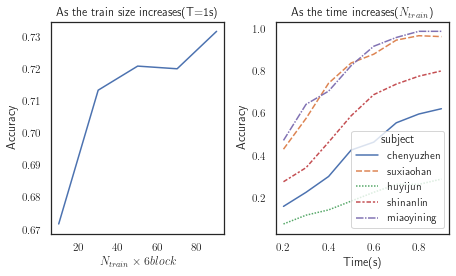

In [20]:

sns.set_theme(style='white')

plt.rcParams['text.usetex'] = True

f,(ax1,ax2) = plt.subplots(1,2,figsize=(6.5,4))

sns.lineplot(data=un_ave[un_ave.winLEN==un_ave.winLEN.unique()[-1]], x='train', y='accuracy',ax=ax1)

sns.lineplot(data=un[un.train==90], x='winLEN', y='accuracy', hue='subject',style='subject',ax=ax2)
plt.tight_layout()

ax1.set_xlabel(r'$N_{train} \times 6 block$')
ax2.set_xlabel('Time(s)')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Accuracy')

ax1.set_title(r'As the train size increases(T=1s)')
ax2.set_title(r'As the time increases($N_{train}$)')

plt.tight_layout()

plt.savefig('../images/unsupPerformance.png',dpi=300,format='png')

# Infinite N

In [21]:
large = []
add = '../results/sweep'
subs = os.listdir(add)
subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'largeset.csv'):
        f = pd.read_csv(subFolder+os.sep+'largeset.csv')
        large.append(f)

large = pd.concat(large,ignore_index=True).drop_duplicates()
large = large.rename(columns={'size': 'N'})
large['winLEN'] = 1
large['ITR'] = large[['accuracy', 'winLEN','N']].apply(lambda row: acutualITR(row), axis=1)

large.tail()

,Unnamed: 0,subject,accuracy,N,sample,winLEN,ITR
95,15,miaoyining,0.904167,790,40,1,494.866412
96,16,miaoyining,0.900000,840,40,1,496.439833
97,17,miaoyining,0.900000,890,40,1,500.943718
98,18,miaoyining,0.900000,940,40,1,505.201393
99,19,miaoyining,0.900000,990,40,1,509.238387


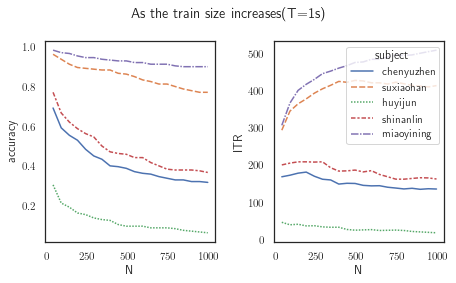

In [29]:
plt.rcParams['text.usetex'] = True

f,(ax1,ax2) = plt.subplots(1,2,figsize=(6.5,4))
sns.set_theme(style='white')
sns.lineplot(data=large,x='N',y='accuracy',hue='subject',ax=ax1,legend=False,style='subject')
sns.lineplot(data=large,x='N',y='ITR',hue='subject',style='subject',ax=ax2)


plt.suptitle(r'As the train size increases(T=1s)')

plt.tight_layout()
plt.savefig('../images/infiniteN.png',dpi=300,format='png')